# Introduction

This notebook is a demo on how to setup a basic Workflow to Work with Jupyter Notebooks


## Setup project

For project setup we will use [poetry](https://python-poetry.org/docs/) as dependency management tool

In [14]:
import sys
import os

sys.path.append('../')
os.chdir("../")

In [87]:
!wget -O - https://install.python-poetry.org | python3 -

--2022-11-25 18:43:53--  https://install.python-poetry.org/
Resolving install.python-poetry.org (install.python-poetry.org)... 76.76.21.241, 76.76.21.9
Connecting to install.python-poetry.org (install.python-poetry.org)|76.76.21.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28457 (28K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]  27.79K  --.-KB/s    in 0.004s  

2022-11-25 18:43:53 (7.45 MB/s) - written to stdout [28457/28457]

Retrieving Poetry metadata

# Welcome to Poetry!

This will download and install the latest version of Poetry,
a dependency and package manager for Python.

It will add the `poetry` command to Poetry's bin directory, located at:

/home/jovyan/.local/bin

You can uninstall at any time by executing this script with the --uninstall option,
and these changes will be reverted.

Installing Poetry (1.2.2)
Installing Poetry (1.2.2): Creating environment
Installing Poetry (1.2.2): Installing Poetry
Inst

In [15]:
%alias poetry /home/jovyan/.local/bin/poetry 

In [16]:
poetry --version

Poetry (version 1.2.2)


In [41]:
import sys

os.environ['PYTHON_BIN'] = sys.executable

In [49]:
poetry env info


Virtualenv
Python:         3.10.6
Implementation: CPython
Path:           /home/jovyan/.cache/pypoetry/virtualenvs/cd4ml-8EXZSVYp-py3.10
Executable:     /home/jovyan/.cache/pypoetry/virtualenvs/cd4ml-8EXZSVYp-py3.10/bin/python
Valid:          True

System
Platform:   linux
OS:         posix
Python:     3.10.6
Path:       /opt/conda
Executable: /opt/conda/bin/python3.10


In [50]:
poetry env use system

### Initialize project 

This will generate the structure necessary to run data science jobs

In [28]:
# Configure here package information that will be put in Poetry configuration
import sys
import os

os.environ['NAME'] = "cd4ml"
os.environ['DESCRIPTION'] = "Data science experiment tutorial"
os.environ['PYTHON'] = f"{sys.version_info[0]}.{sys.version_info[1]}.{sys.version_info[2]}"
os.environ['AUTHOR'] = "Eduardo Santos <eduardo.santos@thoughtworks.com>"

In [29]:
poetry init --name="$NAME" --description="$DESCRIPTION" --python="$PYTHON" --author="$AUTHOR" --no-interaction

You can see generated file clicking here: [pyproject.toml](../pyproject.toml)

### Generate project structure

We are going to use as reference the [data science cookiecutter template](https://drivendata.github.io/cookiecutter-data-science/), which folllows this standard:

```
├── LICENSE
├── Makefile           <- Makefile with commands like `make data` or `make train`
├── README.md          <- The top-level README for developers using this project.
├── data
│   ├── external       <- Data from third party sources.
│   ├── interim        <- Intermediate data that has been transformed.
│   ├── processed      <- The final, canonical data sets for modeling.
│   └── raw            <- The original, immutable data dump.
│
├── docs               <- A default Sphinx project; see sphinx-doc.org for details
│
├── models             <- Trained and serialized models, model predictions, or model summaries
│
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering),
│                         the creator's initials, and a short `-` delimited description, e.g.
│                         `1.0-jqp-initial-data-exploration`.
│
├── references         <- Data dictionaries, manuals, and all other explanatory materials.
│
├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
│   └── figures        <- Generated graphics and figures to be used in reporting
│
├── pyproject.toml     <- Poetry configuration file
│
├── setup.py           <- makes project pip installable (pip install -e .) so src can be imported
├── src                <- Source code for use in this project.
│   ├── __init__.py    <- Makes src a Python module
│   │
│   ├── data           <- Scripts to download or generate data
│   │   └── make_dataset.py
│   │
│   ├── features       <- Scripts to turn raw data into features for modeling
│   │   └── build_features.py
│   │
│   ├── models         <- Scripts to train models and then use trained models to make
│   │   │                 predictions
│   │   ├── predict_model.py
│   │   └── train_model.py
│   │
│   └── visualization  <- Scripts to create exploratory and results oriented visualizations
│       └── visualize.py
│
└── tox.ini            <- tox file with settings for running tox; see tox.readthedocs.io
```

For now we just need the directories that will hold the data code

In [38]:
!mkdir -p src/data
!touch src/__init__.py

## Data extraction

For this example we will download some news feed data to use as a dataset. As this is an introductory example just a few news will be used

### Download data

The goal is to create the case as a multistep feature extraction. First step is to create a function to download data from a service provider

In [51]:
poetry add feedparser pandas metaflow

The following packages are already present in the pyproject.toml and will be skipped:

  • feedparser
  • pandas
  • metaflow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [52]:
poetry install

Installing dependencies from lock file

Package operations: 0 installs, 4 updates, 0 removals

  • Updating python-dateutil (2.8.2 /home/jovyan/.cache/pypoetry/artifacts/39/9b/3b/576da7c854551d780528d75132c98882925e44de0aecf8a31a4bea379c/python_dateutil-2.8.2-py2.py3-none-any.whl -> 2.8.2): Pending...
  • Updating urllib3 (1.26.13 /home/jovyan/.cache/pypoetry/artifacts/0c/77/f9/b449e07d3b668a0706728efd6a7f0a40e7101d2e962853f26d0c062aff/urllib3-1.26.13-py2.py3-none-any.whl -> 1.26.13): Pending...
  • Updating urllib3 (1.26.13 /home/jovyan/.cache/pypoetry/artifacts/0c/77/f9/b449e07d3b668a0706728efd6a7f0a40e7101d2e962853f26d0c062aff/urllib3-1.26.13-py2.py3-none-any.whl -> 1.26.13): Pending...
  • Updating python-dateutil (2.8.2 /home/jovyan/.cache/pypoetry/artifacts/39/9b/3b/576da7c854551d780528d75132c98882925e44de0aecf8a31a4bea379c/python_dateutil-2.8.2-py2.py3-none-any.whl -> 2.8.2): Installing...
  • Updating urllib3 (1.26.13 /home/jovyan/.cache/pypoetry/artifacts/0c/77/f9/b449e07d3b66

In [3]:
import feedparser
import pandas as pd

url = 'https://g1.globo.com/rss/g1/'

blog_feed = feedparser.parse(url)

posts = blog_feed.entries  
post_list = []

for post in posts:
    post_dict = dict()

    post_dict["TITLE"] = post.title
    post_dict["CONTENT"] = post.summary
    post_dict["LINK"] = post.link
    post_dict["TIME_PUBLISHED"] = post.published
    # post_dict["TAGS"] = [tag.term for tag in post.tags]

    post_list.append(post_dict)
df_post = pd.DataFrame(post_list)
df_post

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Quais temas de geografia podem ser abordados n...,"<img src=""https://s2.glbimg.com/7FgpcBhK-X6T-y...",https://g1.globo.com/rn/rio-grande-do-norte/de...,"Fri, 28 Oct 2022 13:22:29 -0000"
1,"Mulher é morta a facadas em Vila Velha, ES; fi...","<img src=""https://s2.glbimg.com/i8CO87Fwr1iKMk...",https://g1.globo.com/es/espirito-santo/noticia...,"Fri, 28 Oct 2022 13:21:39 -0000"
2,Ponta Grossa abre inscrições para concurso com...,"<img src=""https://s2.glbimg.com/jLG68N1r4fFcc3...",https://g1.globo.com/pr/campos-gerais-sul/noti...,"Fri, 28 Oct 2022 13:21:02 -0000"
3,Deputada paraguaia canta e dança Shakira enqua...,"<img src=""https://s2.glbimg.com/_zzdjqO4hJNKIg...",https://g1.globo.com/mundo/noticia/2022/10/28/...,"Fri, 28 Oct 2022 13:20:17 -0000"
4,'Encontro de Tenores do Brasil' terá artistas ...,"<img src=""https://s2.glbimg.com/n8T_w9Ta8rV4Ql...",https://g1.globo.com/am/amazonas/noticia/2022/...,"Fri, 28 Oct 2022 13:19:30 -0000"
5,Temperatura aumenta nos grupos de família no W...,"<img src=""https://s2.glbimg.com/WAuJw0rZ4ZfF0z...",https://g1.globo.com/politica/eleicoes/2022/no...,"Fri, 28 Oct 2022 13:18:36 -0000"
6,Grávida é levada de helicóptero ao hospital ap...,"<img src=""https://s2.glbimg.com/Kdk9XHkOt__icU...",https://g1.globo.com/mt/mato-grosso/noticia/20...,"Fri, 28 Oct 2022 13:17:21 -0000"
7,Vídeo mostra caixão com corpo caindo de carro ...,"<img src=""https://s2.glbimg.com/h-zmIhrMrDAUi6...",https://g1.globo.com/sp/ribeirao-preto-franca/...,"Fri, 28 Oct 2022 13:16:50 -0000"
8,Domingo do 2º turno das Eleições 2022 tem poss...,"<img src=""https://s2.glbimg.com/9Ew7YQkSH-Grpc...",https://g1.globo.com/mg/minas-gerais/noticia/2...,"Fri, 28 Oct 2022 13:14:28 -0000"
9,Banda paraibana Emerald Hill lança álbum 'Cida...,"<img src=""https://s2.glbimg.com/EFJoW3QC2rdY3G...",https://g1.globo.com/pb/paraiba/musica/noticia...,"Fri, 28 Oct 2022 13:14:00 -0000"


### Create your first metaflow workflow

Now that we downloaded the data we can use to create new features. Let's create a workflow to download feeds from differente providers. No we are going to user [Neflix Open Source metaflow Workflow package](https://metaflow.org/) to make the job easier.

In [4]:
!pip install metaflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.0/853.0 kB 5.6 MB/s eta 0:00:0000:0100:01
  Using cached boto3-1.25.3-py3-none-any.whl (132 kB)
  Using cached pylint-2.15.5-py3-none-any.whl (508 kB)
  Using cached s3transfer-0.6.0-py3-none-any.whl (79 kB)
  Using cached botocore-1.28.3-py3-none-any.whl (9.3 MB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached mccabe-0.7.0-py2.py3-none-any.whl (7.3 kB)
  Using cached platformdirs-2.5.2-py3-none-any.whl (14 kB)
  Using cached tomlkit-0.11.6-py3-none-any.whl (35 kB)
  Using cached astroid-2.12.12-py3-none-any.whl (264 kB)
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached isort-5.10.1-py3-none-any.whl (103 kB)
  Using cached lazy_object_proxy-1.8.0-cp310-cp310-linux_aarch64.whl
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (78 kB)


In [5]:
%%writefile ../cd4ml/feeds_flow.py

import feedparser
import pandas as pd

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.end)
              
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()

Overwriting ../cd4ml/feeds_flow.py


In [7]:
!python ../cd4ml/feeds_flow.py show

Metaflow 2.7.13 executing FeedsFlow for user:jovyan



Step start
    ?
    => fetch_feed_data

Step fetch_feed_data
    ?
    => feeds_aggregate

Step feeds_aggregate
    ?
    => end

Step end
    ?



In [8]:
!python ../cd4ml/feeds_flow.py run

Metaflow 2.7.13 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-10-28 13:35:44.421 Workflow starting (run-id 1666964144366783):
2022-10-28 13:35:44.446 [1666964144366783/start/1 (pid 125)] Task is starting.
2022-10-28 13:35:45.050 [1666964144366783/start/1 (pid 125)] Foreach yields 3 child steps.
2022-10-28 13:35:45.050 [1666964144366783/start/1 (pid 125)] Task finished successfully.
2022-10-28 13:35:45.082 [1666964144366783/fetch_feed_data/2 (pid 129)] Task is starting.
2022-10-28 13:35:45.101 [1666964144366783/fetch_feed_data/3 (pid 130)] Task is starting.
2022-10-28 13:35:45.116 [1666964144366783/fetch_feed_data/4 (pid 131)] Task is starting.
2022-10-28 13:35:45.817 [1666964144366783/fetch_feed_data/4 (pid 131)] Downloading from url https://g1.globo.com/rss/g1/brasil
2022-10-28 13:35:45.890 [1666964144366783/fetch_feed_data/2 (pid 129)] Downloading from url https://feeds.folha.uol.com.br/emcimadahora/r

### Investigating results

Metaflow package has a builtin experiment versioning system. Let's analyze the worflow and its executions so far

In [11]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1666964144366783')]

It is possible to see all valid runs, that by now are running locally. Next step is to analyze its results.

In [43]:
from metaflow import Run
r = Run('FeedsFlow/1666964144366783')

Acessing the `data` attribute for the run it is possible to see the final result consolidated by the run. Let's analyze it and compare to the manually generated data created before

In [19]:
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,A bolsonarização do kirchnerismo,"Nunca se saberá se as<a href=""https://www1.fol...",https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 10:30:00 -0300
1,Confiança de serviços do Brasil vai em outubro...,"A <a href=""https://www1.folha.uol.com.br/merca...",https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 10:23:00 -0300
2,Empresário João Carlos Camargo vai presidir a ...,"O <a href=""https://www1.folha.uol.com.br/colun...",https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 10:17:00 -0300
3,'Vigília cívica' para o 2º turno terá ato com ...,"A ex-procuradora-geral da República <a href=""h...",https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 10:12:00 -0300
4,Dólar salta mais de 1% com busca por proteção ...,O dólar avançava mais de 1% em relação ao real...,https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 10:06:00 -0300
...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000"
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000"
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000"
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000"


## Feature generation

Now that we have been able to add news from other sources, let's run a simple feature generation process. As the goal is to tokenize the results, let's add a new step to the workflow creating a tokenized version of the content. The final goal is to apply an LDA transformation.

In [26]:
!pip install nltk

In [27]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/jovyan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_

True

### Tokenization

Our new workflow will have a preprocess step added to tokenize news texts. Let's bring back the old workflow and add new code to it. You can get the file we just generated by executing the load command in an empty cell:

```
%load ../cd4ml/feeds_flow.py
```

Then we will write the results back to the cell


```
%%writefile ../cd4ml/feeds_flow.py
```

In [54]:
%%writefile ../cd4ml/feeds_flow.py
# %load ../cd4ml/feeds_flow.py

import feedparser
import pandas as pd
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.preprocess_pandas)
              
    @step
    def preprocess_pandas(self):
        stop = set(stopwords.words('portuguese') + list(string.punctuation))
        stop.update(['http', 'pro', 'https', 't.', 'co'])

        def preprocess(words):
            # Remove HTML marks
            words = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', words)
            tokens = word_tokenize(words)
            tokens = [word for word in tokens if word not in stop]
            tokens = [word for word in tokens if re.search(r'\w+', word) and len(word) > 2]
            return tokens
    
        self.results['token_set'] = self.results.apply(lambda row: preprocess(row.CONTENT.lower()), axis=1)
        print("Tokenization finished!")
        self.next(self.end)
    
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()


Overwriting ../cd4ml/feeds_flow.py


In [51]:
!python ../cd4ml/feeds_flow.py run

Metaflow 2.7.13 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-10-28 14:36:15.835 Workflow starting (run-id 1666967775776033):
2022-10-28 14:36:15.859 [1666967775776033/start/1 (pid 1937)] Task is starting.
2022-10-28 14:36:16.510 [1666967775776033/start/1 (pid 1937)] Foreach yields 3 child steps.
2022-10-28 14:36:16.511 [1666967775776033/start/1 (pid 1937)] Task finished successfully.
2022-10-28 14:36:16.542 [1666967775776033/fetch_feed_data/2 (pid 1941)] Task is starting.
2022-10-28 14:36:16.561 [1666967775776033/fetch_feed_data/3 (pid 1942)] Task is starting.
2022-10-28 14:36:16.579 [1666967775776033/fetch_feed_data/4 (pid 1943)] Task is starting.
2022-10-28 14:36:17.452 [1666967775776033/fetch_feed_data/3 (pid 1942)] Downloading from url https://g1.globo.com/rss/g1/
2022-10-28 14:36:17.468 [1666967775776033/fetch_feed_data/2 (pid 1941)] Downloading from url https://feeds.folha.uol.com.br/emcimadahora

Let's see the resulting data after adding one step.

In [52]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1666967775776033'),
 Run('FeedsFlow/1666967484255125'),
 Run('FeedsFlow/1666964144366783')]

There's a new run with the new features. One of the most important features in metaflow is the experiment versioning. Loading the new execution it is possible to see the newly generated results.

In [53]:
from metaflow import Run
r = Run('FeedsFlow/1666967775776033')
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED,token_set
0,Vida e morte do trabalhismo no Brasil,O ano era 1980. O pano de fundo a reorganizaçã...,https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 11:27:00 -0300,"[ano, 1980., pano, fundo, reorganização, parti..."
1,SP terá passe livre eleitoral pela primeira ve...,O Governo de São Paulo e a prefeitura paulista...,https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 11:25:00 -0300,"[governo, paulo, prefeitura, paulistana, anunc..."
2,"Décio Lima, do PT, diz apostar em voto silenci...","Candidato a governador de <a href=""https://www...",https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 11:21:00 -0300,"[candidato, governador, santa, catarina, décio..."
3,CNJ suspende perfis de juízes favoráveis a Bol...,"O <a href=""https://www1.folha.uol.com.br/colun...",https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 11:18:00 -0300,"[corregedor, cnj, conselho, nacional, justiça,..."
4,Domingo de eleição deve ter calor e chuva em p...,"O próximo domingo (30), quando acontece o <a h...",https://redir.folha.com.br/redir/online/emcima...,28 Oct 2022 11:16:00 -0300,"[próximo, domingo, acontece, segundo, turno, e..."
...,...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000","[órgão, passará, atender, rua, perdizes, 280, ..."
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000","[agressão, aconteceu, madrugada, desta, segund..."
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000","[jovem, morta, agosto, 2016., seis, pessoas, p..."
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000","[segundo, delegado, necessárias, três, semanas..."


### Date conversion

As the feeds have different formats for date, let's try to generate an unified date field. Again we load and generate a new file for the flow

In [15]:
!pip install pendulum

In [39]:
%%writefile ../cd4ml/feeds_flow.py
# %load ../cd4ml/feeds_flow.py

import feedparser
import pandas as pd
import re

from nltk import word_tokenize
from nltk.corpus import stopwords

import string
import pendulum

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]
            
            # First date conversion try:
            dt = None
            try:
                dt = pendulum.from_format(post.published, 'DD MMM YYYY HH:mm:ss ZZ') 
            except ValueError as e:
                dt = pendulum.from_format(post.published, 'ddd, DD MMM YYYY HH:mm:ss ZZ')
            except ValueError as e:
                print(f"Formating error!\n{e}")
            post_dict['PUBLISHED'] = dt

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.preprocess_pandas)
              
    @step
    def preprocess_pandas(self):
        stop = set(stopwords.words('portuguese') + list(string.punctuation))
        stop.update(['http', 'pro', 'https', 't.', 'co'])

        def preprocess(words):
            # Remove HTML marks
            words = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', words)
            tokens = word_tokenize(words)
            tokens = [word for word in tokens if word not in stop]
            tokens = [word for word in tokens if re.search(r'\w+', word) and len(word) > 2]
            return tokens
    
        self.results['token_set'] = self.results.apply(lambda row: preprocess(row.CONTENT.lower()), axis=1)
        print("Tokenization finished!")
        self.next(self.end)
    
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()


Overwriting ../cd4ml/feeds_flow.py


In [40]:
!python ../cd4ml/feeds_flow.py run

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-11-21 18:29:10.322 Workflow starting (run-id 1669055350264145):
2022-11-21 18:29:10.350 [1669055350264145/start/1 (pid 843)] Task is starting.
2022-11-21 18:29:11.073 [1669055350264145/start/1 (pid 843)] Foreach yields 3 child steps.
2022-11-21 18:29:11.073 [1669055350264145/start/1 (pid 843)] Task finished successfully.
2022-11-21 18:29:11.103 [1669055350264145/fetch_feed_data/2 (pid 847)] Task is starting.
2022-11-21 18:29:11.126 [1669055350264145/fetch_feed_data/3 (pid 848)] Task is starting.
2022-11-21 18:29:11.141 [1669055350264145/fetch_feed_data/4 (pid 849)] Task is starting.
2022-11-21 18:29:11.984 [1669055350264145/fetch_feed_data/4 (pid 849)] Downloading from url https://g1.globo.com/rss/g1/brasil
2022-11-21 18:29:11.989 [1669055350264145/fetch_feed_data/2 (pid 847)] Downloading from url https://feeds.folha.uol.com.br/emcimadahora/r

Let's see again the output data

In [41]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1669055350264145'),
 Run('FeedsFlow/1666967775776033'),
 Run('FeedsFlow/1666967484255125'),
 Run('FeedsFlow/1666964144366783')]

In [42]:
from metaflow import Run
r = Run('FeedsFlow/1669055350264145')
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED,PUBLISHED,token_set
0,Depois da COP27,Os líderes mundiais chegam ao final da<a href=...,https://redir.folha.com.br/redir/online/emcima...,21 Nov 2022 15:17:00 -0300,2022-11-21 15:17:00-03:00,"[líderes, mundiais, chegam, final, cop27, conf..."
1,Holanda vence jogo duro contra senegaleses na ...,Quem esperava uma vitória com autoridade dos h...,https://redir.folha.com.br/redir/online/emcima...,21 Nov 2022 15:04:00 -0300,2022-11-21 15:04:00-03:00,"[esperava, vitória, autoridade, holandeses, ap..."
2,Risco de assassinato é 3 vezes maior para negr...,O risco de pessoas negras serem mortas no Bras...,https://redir.folha.com.br/redir/online/emcima...,21 Nov 2022 15:03:00 -0300,2022-11-21 15:03:00-03:00,"[risco, pessoas, negras, serem, mortas, brasil..."
3,O que incomoda no Qatar não incomoda ao seu lado?,"Começou a primeira <a href=""https://www1.folha...",https://redir.folha.com.br/redir/online/emcima...,21 Nov 2022 15:00:00 -0300,2022-11-21 15:00:00-03:00,"[começou, primeira, copa, mundo, realizada, pa..."
4,'Multiversus' põe LeBron James e Salsicha para...,"A Arlequina, inimiga do <a href=""https://www1....",https://redir.folha.com.br/redir/online/emcima...,21 Nov 2022 15:00:00 -0300,2022-11-21 15:00:00-03:00,"[arlequina, inimiga, batman, forte, arya, star..."
...,...,...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000",2018-07-23 15:33:44+00:00,"[órgão, passará, atender, rua, perdizes, 280, ..."
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000",2018-07-23 15:30:17+00:00,"[agressão, aconteceu, madrugada, desta, segund..."
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000",2018-07-23 15:21:41+00:00,"[jovem, morta, agosto, 2016., seis, pessoas, p..."
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000",2018-07-23 15:06:03+00:00,"[segundo, delegado, necessárias, três, semanas..."


In [64]:
df_r.iloc[0]['CONTENT']

'Os líderes mundiais chegam ao final da<a href="https://www1.folha.uol.com.br/folha-topicos/cop27/" rel="" target=""> </a><a href="https://www1.folha.uol.com.br/folha-topicos/cop27/" rel="" target="">COP27</a> (Conferência do Clima da ONU, realizada no Egito) nos entregando um planeta na rota de chegarmos perto de 3<sup>o</sup>C de <a href="https://www1.folha.uol.com.br/folha-topicos/mudanca-climatica/" rel="" target="">aquecimento </a>até 2100, o que significa um futuro trágico. Os países não aumentaram as suas ambições e não chegaram a um acordo sobre o fim dos combustíveis fósseis, o maior responsável pelo aquecimento. A grande conquista foi a <a href="https://www1.folha.uol.com.br/ambiente/2022/11/em-decisao-historica-cop27-cria-fundo-para-reparar-perdas-e-danos-climaticos.shtml" rel="" target="">criação de um fundo de perdas e danos</a>, mas ainda estamos longe de o dinheiro chegar para os países que já sofrem com a <a href="https://www1.folha.uol.com.br/folha-topicos/mudanca-clim

### Final basic flow

Let's visualize it and see hot the basic flow stands

In [70]:
!mamba install -y graphviz
!pip install graphviz


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['graphviz']

conda-forge/linux-aarch64                                   Using cache
conda-forge/no

In [76]:
!mkdir -p data
!python ../cd4ml/feeds_flow.py output-dot | dot -Tpng -o data/feeds.dot

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Visualizing the flow as a GraphViz graph
    Try piping the output to 'dot -Tpng -o graph.png' to produce an actual image.


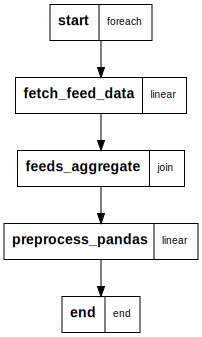

In [77]:
import graphviz

graphviz.Source.from_file('feeds.dot')

## Writing results

Finally we will use the generated Dataframe to save parquet generated files that can be used on next steps